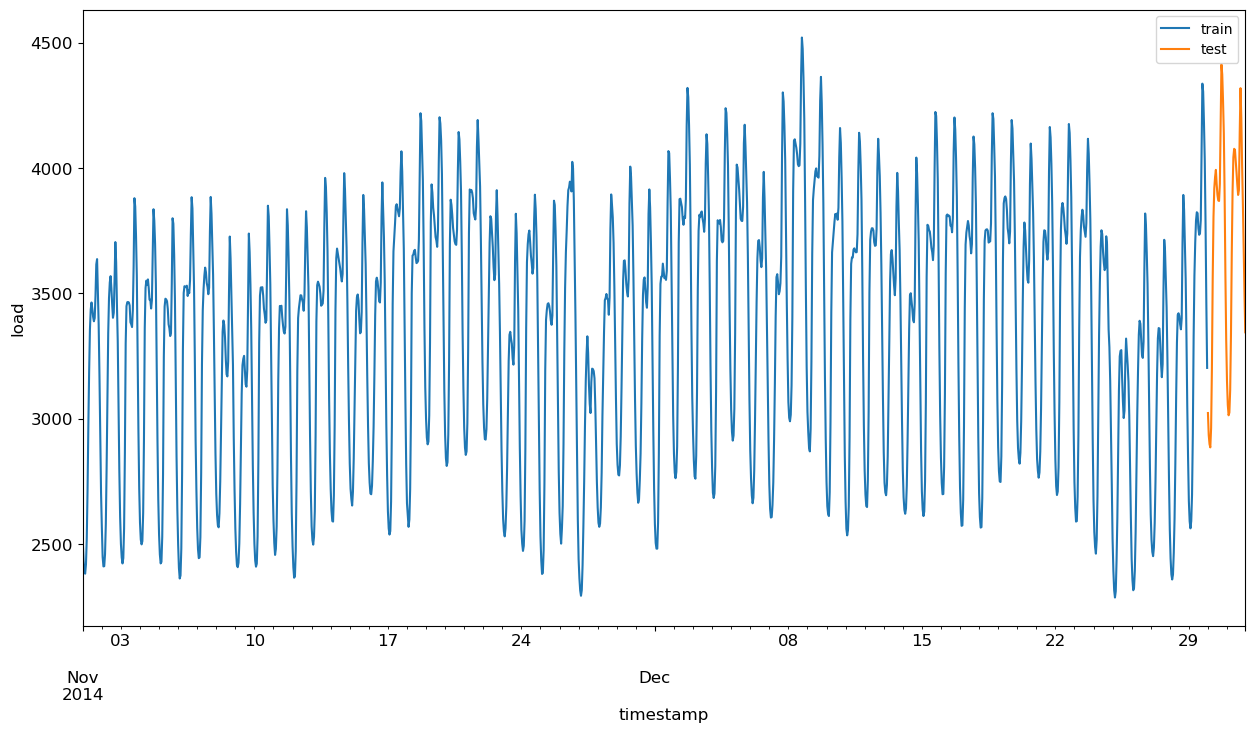

In [5]:
import sys
sys.path.append('../../')

import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

# Define fallback versions of missing utils
def load_data(filepath):
    return pd.read_csv(filepath)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Load data
df = load_data('energy.csv')

# Ensure timestamp is datetime and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Define training and testing date ranges
train_start_dt = '2014-11-01 00:00:00'
test_start_dt = '2014-12-30 00:00:00'

# Plot train vs test
df[(df.index < test_start_dt) & (df.index >= train_start_dt)][['load']].rename(columns={'load': 'train'}) \
  .join(df[test_start_dt:][['load']].rename(columns={'load': 'test'}), how='outer') \
  .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)

plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()